<a href="https://colab.research.google.com/github/Roshthevampire/ShapeAI/blob/main/ROSHINI_M_Python_and_Data_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TITANIC SURVIVOR ANALYSIS**

In [ ]:
import numpy as np
import pandas as pd

## READING DATA USING PANDAS
We use pandas *read_csv* function to read the csv file in python and use the pandas *DataFrame* method to convert the same file into data frame.

In [ ]:
df=pd.DataFrame(pd.read_csv('/content/train (1).csv'))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##Description of the Dataset's attributes
* Pclass: Passenger Class (1=1st;2=2nd;3=3rd)
* survival= Survival (0=No; 1=Yes)
* name: Name
* sex: Sex
* age: Age
* sibsp: Number of Siblings/Spouses Aboard
* parch: Number of Parents/Children Aboard
* ticket: Ticket number
* fare: Passenger Fare (British pound)
* cabin: Cabin
* embarked: Port of embarkation (C=Cherbourg; Q=Queenstown; S=Southampton)


In [ ]:
print('The data has shape:',df.shape)
print('The data is of type:',type(df))

The data has shape: (891, 12)
The data is of type: <class 'pandas.core.frame.DataFrame'>


## HANDLING NULL VALUES
The dataset may contain many rows and columns for which some values may be missing and we can't leave those missing values as it is.
In such cases, we have two options:
* Drop the entire row or column.
* Fill the missing values with some appropriate values, like mean of all the values of that column.

In [ ]:
print('Is the value null?\n')
df.isnull()

Is the value null?



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


The above data is very large to analyze on our own.

In [ ]:
print('Number of null values in each column:\n')
df.isnull().sum()

Number of null values in each column:



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Separating out the columns which have more than 50% of the values missing in the dataset:

In [ ]:
drop_col=df.isnull().sum()[df.isnull().sum()>(50/100*df.shape[0])]
drop_col

Cabin    687
dtype: int64

In [ ]:
drop_col.index

Index(['Cabin'], dtype='object')

In [ ]:
df.drop(drop_col.index, axis=1,  inplace=True)
df.isnull().sum()
#Cabin column is dropped

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

For the **Age**, we can fill the NULL values with the mean value of all the values in that column.

In [ ]:
df.fillna(df.mean(), inplace=True)
#All the NULL values in the dataset will be filled by the mean value of the column

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

But, in the dataset, **Embarked** column contains only strings. So, like other columns, we cannot handle the NULL values by filling with mean values. 

In [ ]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

So, for *Embarked* attribute, we can fill the NULL values with the most frequent values in the column. And, from the above data, **S** is the most frequent value.

In [ ]:
df['Embarked'].fillna('S',inplace=True)
#NULL values in Embarked is filled with 'S'

In [ ]:
df.isnull().sum()
#Finally, all the NULL values have been filled

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


**sibsp**: Number of Siblings/ Spouses Aboard

**parch**: Number of Parents/ Children Aboard

So we can make a new column *family_size* by combining these two columns.


In [ ]:
df['FamilySize'] = df['SibSp']+df['Parch']
df.drop(['SibSp','Parch'], axis=1, inplace=True)
df.corr()

,PassengerId,Survived,Pclass,Age,Fare,FamilySize
PassengerId,1.000000,-0.005007,-0.035144,0.033207,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.069809,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.331339,-0.549500,0.065997
Age,0.033207,-0.069809,-0.331339,1.000000,0.091566,-0.248512
Fare,0.012658,0.257307,-0.549500,0.091566,1.000000,0.217138
FamilySize,-0.040143,0.016639,0.065997,-0.248512,0.217138,1.000000


**FamilySize** in the ship does not have much correlance with survival rate.

Let's check whether if the person was alone or not can affect the survival rate.

In [ ]:
df['Alone']=[0 if df['FamilySize'][i]>0 else 1 for i in df.index]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

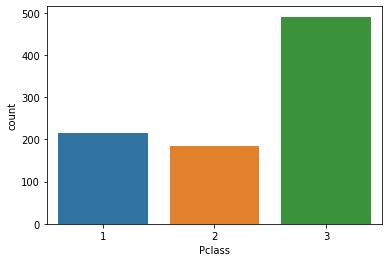

In [ ]:
sb.countplot(data=df, x='Pclass')

From the bar chart, we can see that 3rd class people/passengers were more in number.

In [ ]:
df.groupby(['Alone'])['Survived'].mean()

Alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

If the person was alone, he/she had less chance of surviving.

From the correlation result also, it could be observed that people with Pclass low (like 1st class- who are rich) had better chance of surving than the other.

So, the reason might be that the person who is travelling with his/her family might be belonging to richer class and might be prioritized over the other though lower class people were higher in count.

In [ ]:
df[['Alone','Fare']].corr()

,Alone,Fare
Alone,1.000000,-0.271832
Fare,-0.271832,1.000000


So, we can see that if the person was not alone, the chance that the ticket price is higher is high.

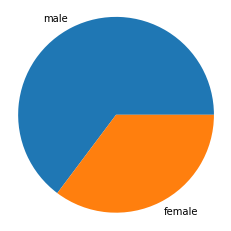

In [ ]:
sorted_counts = df['Sex'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index);
plt.axis('square');

From the above pie chart, we can observe that majority passengers were male.

In [ ]:
df['Sex']=[0 if df['Sex'][i]=='male' else 1 for i in df.index]
#we put 1 female and 0 for male
df.groupby(['Sex'])['Survived'].mean()

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64

The above data shows that female passengers had more chance of surviving that the male passengers eventhough male passengers were more.

So, women were prioritized over men.

In [ ]:
df.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

The data shows Cherbourg people have had more chance of survival. 

0--->Not survived
1--->Survived


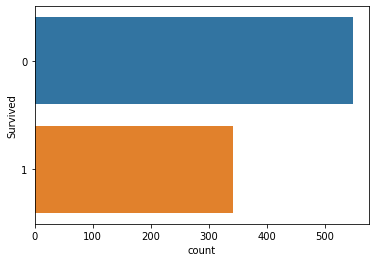

In [ ]:
sb.countplot(data=df, y='Survived')
print("0--->Not survived\n1--->Survived")

Finally, from the above bar chart, we can see that nearly 550 (approx) people did not survive, which is a huge number compared to the 340(approx) people who only survived. 

#**CONCLUSION:**
*   Eventhough male passengers count is very high compared to female passengers, survival of women passengers is high compared to male passengers. This shows *Women were prioritized over men*
*   Eventhough 3rd class passengers are very high compared to other richer classes, richer class passengers have higher survival rate than the others. This shows may be *hierachy might have been followed while saving the passangers*.
*  Passengers *travelling with their family have  higher survival rate* compared to passengers who travelled alone.
*  Eventhough huge number of passengers boarded the ship at Southampton, *Passengers who boarded the ship at Cherbourg survived more in count that the others*.
*  If the person was *not alone, the chance of ticket price being higher is high*.
* Only *38%(approx.) passengers survived* and nearly *62%(approx.) passengers did not survive*. 

